## Encoding a matrix in a single bitstream using ANS coding

snippets taken from `https://github.com/bamler-lab/webgl-entropy-coding`

Using Alex's Library to get **4-bit** weights:

In [1]:
from nn_compression.quantisation import gptq_quantise_network
from nn_compression.networks import LayerwiseHessianTracker
from data_utils.arrays import to_idx_space, find_dx

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

2025-03-10 15:44:34.988405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741617875.010250   19665 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741617875.016453   19665 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 15:44:35.037656: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
20
[-0.19753015 -0.17777714 -0.15802412 -0.13827111 -0.11851809 -0.09876508
 -0.07901206 -0.05925905 -0.03950603 -0.01975301 -0.          0.01975301
  0.03950603  0.05925905  0.07901206  0.09876508  0.11851809  0.13827111
  0.15802412  0.17777714]
20
4.067816568867111
Entropy of 4 bit quantized weights: 4.067816568867112


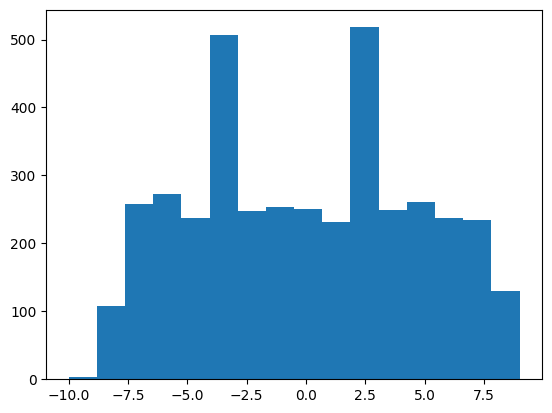

In [62]:
input_dim =  40  #4096    # LLAMA 3 8B hidden dim 
output_dim = 100  #14336  # and FFN Dimension (https://arxiv.org/pdf/2407.21783 Table 3)

net = nn.Linear(input_dim, output_dim)
net.eval()

x_cal = torch.randn(1, input_dim)
netq = gptq_quantise_network(net, nbits=4, x_cal=x_cal)
w = netq.weight.data

ints = to_idx_space(w) # out integer values of w where w = ints * dx
dx = find_dx(w) # required for floating point calc

torch.all(w == ints * dx).item()
# torch.save(ints, "matrix.pt")
# ints.tofile("matrix.bin")
v, c = np.unique(ints, return_counts=True)
plt.hist(ints.flatten(),bins=16)
print(v)
print(len(v))
v,c = np.unique(w, return_counts=True)
print(v)
print(len(v))



ps = c/(c.sum())
ent = -np.sum(ps*np.log2(ps)) # calculte
ent2 = np.log2(input_dim*output_dim) - c @np.log2(c) /(input_dim*output_dim)
print(ent2)
print(f"Entropy of 4 bit quantized weights: {ent}")

[-11  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
20
[-0.21726748 -0.1777643  -0.15801272 -0.13826112 -0.11850954 -0.09875795
 -0.07900636 -0.05925477 -0.03950318 -0.01975159 -0.          0.01975159
  0.03950318  0.05925477  0.07900636  0.09875795  0.11850954  0.13826112
  0.15801272  0.1777643 ]
20
4.071758079133642
Entropy of 4 bit quantized weights: 4.071758079133644


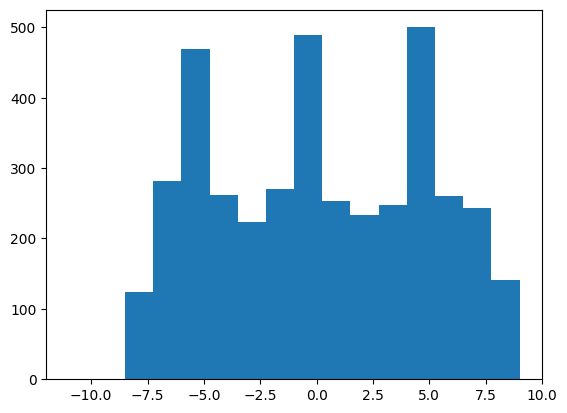

In [77]:
seed = 54

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


input_dim =  40  
output_dim = 100 

net = nn.Linear(input_dim, output_dim)
net.eval()

x_cal = torch.randn(1, input_dim)
netq = gptq_quantise_network(net, nbits=4, x_cal=x_cal)
w = netq.weight.data

ints = to_idx_space(w) # out integer values of w where w = ints * dx
dx = find_dx(w) # required for floating point calc

torch.all(w == ints * dx).item()
# torch.save(ints, "matrix.pt")
# ints.tofile("matrix.bin")
v, c = np.unique(ints, return_counts=True)
plt.hist(ints.flatten(),bins=16)
print(v)
print(len(v))
v,c = np.unique(w, return_counts=True)
print(v)
print(len(v))



ps = c/(c.sum())
ent = -np.sum(ps*np.log2(ps)) # calculte
ent2 = np.log2(input_dim*output_dim) - c @np.log2(c) /(input_dim*output_dim)
print(ent2)
print(f"Entropy of 4 bit quantized weights: {ent}")